In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

In [ ]:
df = pd.read_csv('heart.xls')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
print(df.head())

# columns_to_keep = ['Age', 'Cholesterol', 'RestingBP']
# df = df.loc[:, columns_to_keep]

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
print(df.describe())
# print(df.isnull().sum())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

Linear Regression:
Coefficients: [1.28557432 0.13463094 0.24321354]
Intercept: 123.01385658745784
Mean Squared Error: 3350.5647870459275
R^2 Score: 0.02093026361313266




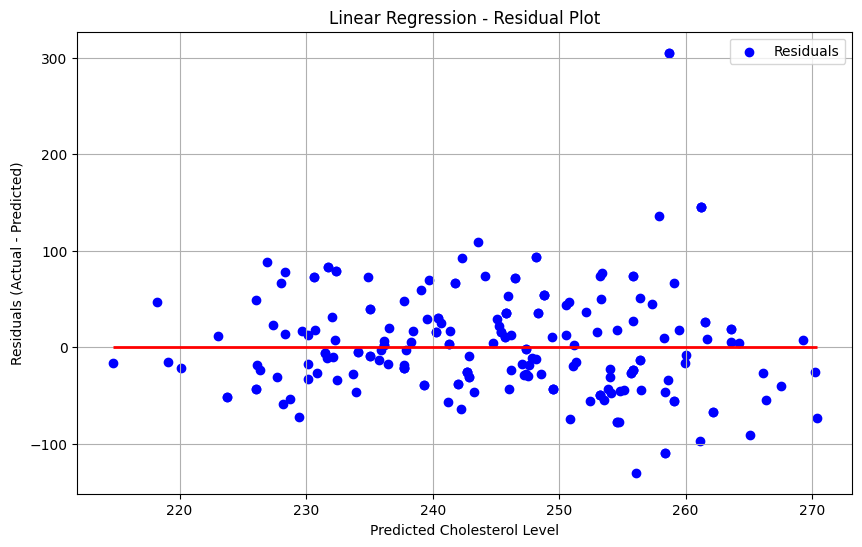

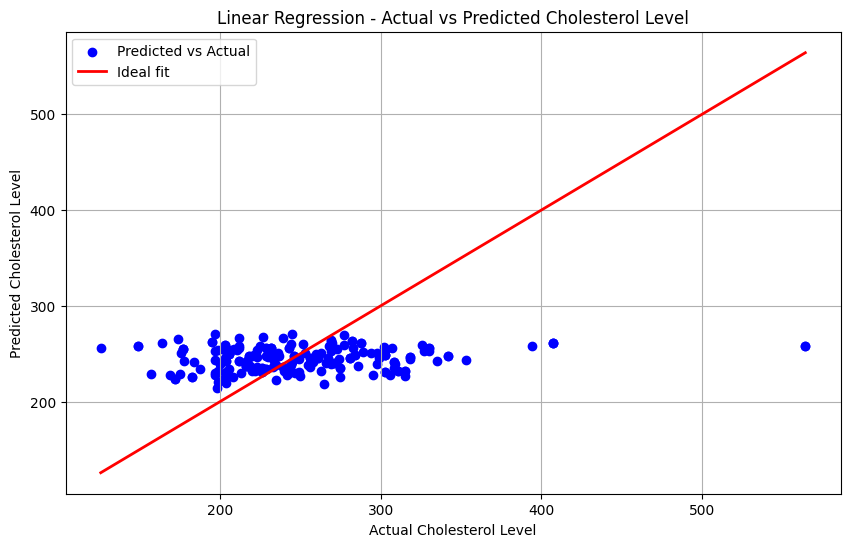

Lasso Regression:
Coefficients: [1.28400515 0.13419295 0.24310783]
Intercept: 123.17850606329677
Mean Squared Error: 3350.5639339777495
R^2 Score: 0.02093051288849057




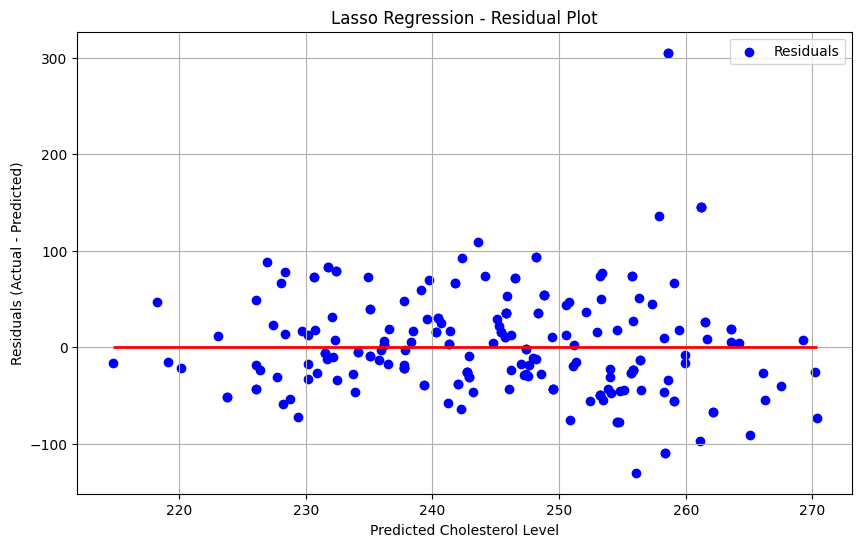

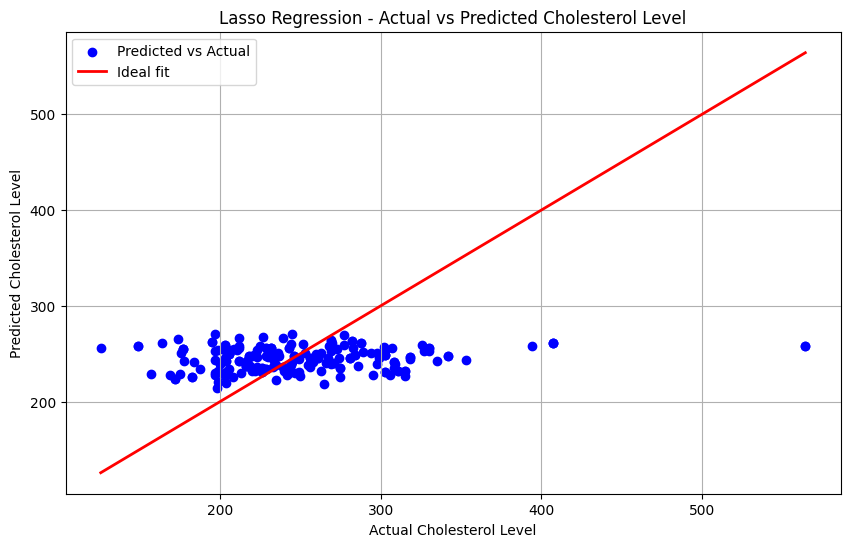

Ridge Regression:
Coefficients: [1.28555036 0.13462697 0.24321603]
Intercept: 123.01542301783714
Mean Squared Error: 3350.5649722542853
R^2 Score: 0.02093020949333213




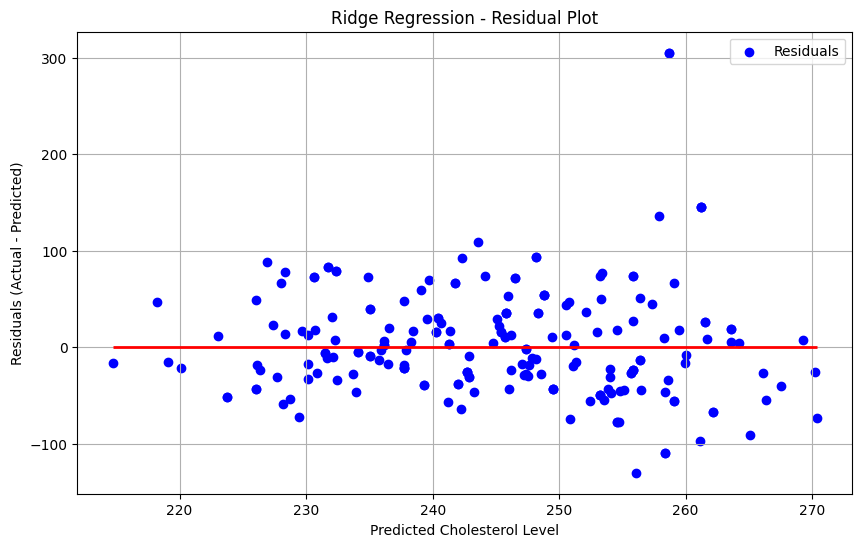

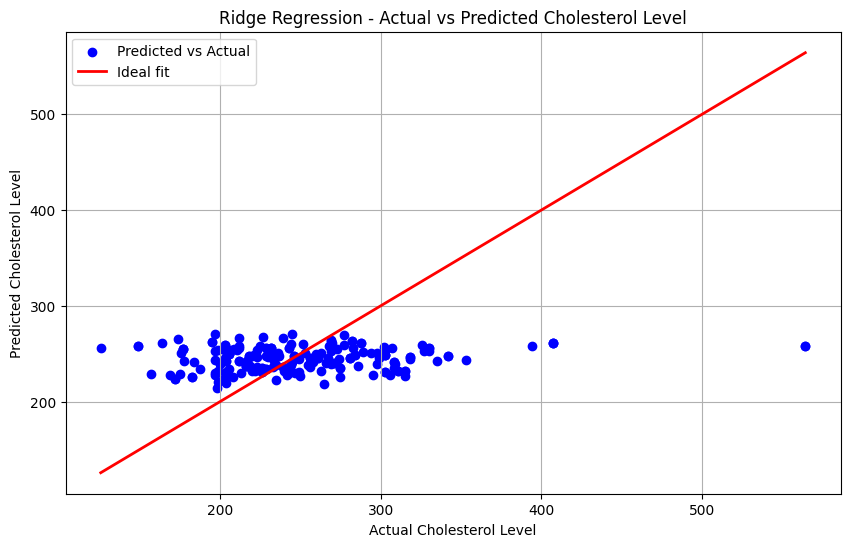

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Selecting 'age', 'thalach', and 'trestbps' as independent variables (X)
X = df[['age', 'thalach', 'trestbps']].values
y = df['chol'].values  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and their names
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0)
}

# Loop over each model, train it, make predictions, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Print model coefficients and intercept
    print(f"{name}:")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print("\n")

    # Plot the residuals
    plt.figure(figsize=(10, 6))
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, color='blue', label='Residuals')
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linewidth=2)
    plt.title(f'{name} - Residual Plot')
    plt.xlabel('Predicted Cholesterol Level')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal fit')
    plt.title(f'{name} - Actual vs Predicted Cholesterol Level')
    plt.xlabel('Actual Cholesterol Level')
    plt.ylabel('Predicted Cholesterol Level')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


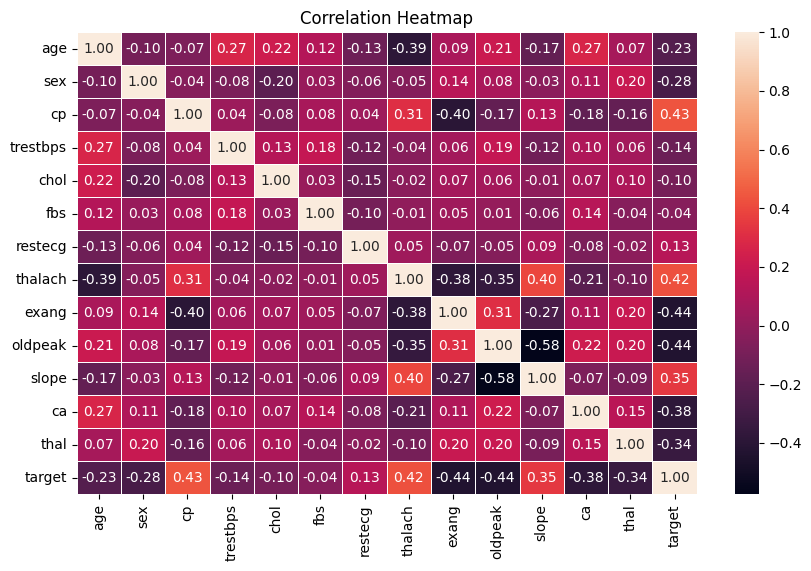

In [ ]:
correlation_matrix=df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df = df.drop(columns=['fbs'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Load the dataset

# Select the features (independent variables) and the target (dependent variable)
# Assuming 'target' is the column you're trying to predict
X = df.drop(columns=['target']).values  # All columns except 'target'
y = df['target'].values  # Target variable (binary classification)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print model coefficients and accuracy metrics
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Interpret the accuracy
if accuracy >= 0.75:
    print("The model has a good fit.")
elif accuracy >= 0.5:
    print("The model has a moderate fit.")
else:
    print("The model has a poor fit.")

mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Coefficients: [[-3.30237564e-04 -1.73293882e+00  8.40978267e-01 -1.84833447e-02
  -8.96770763e-03  2.69653319e-01  2.86212318e-02 -8.37535461e-01
  -6.76006622e-01  5.48622731e-01 -8.20906442e-01 -1.05941872e+00]]
Intercept: [3.8347202]
Accuracy: 0.7951219512195122
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

The model has a good fit.
Mean Absolute Error (MAE): 0.2048780487804878
Mean Squared Error (MSE): 0.2048780487804878
Root Mean Squared Error (RMSE): 0.45263456427949444


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create the random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

# Print metrics
print(f'Accuracy (Random Forest Classifier): {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy (Random Forest Classifier): 0.9853658536585366
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
from google.colab import files
uploaded = files.upload()



Saving heart.csv to heart.csv


Dataset preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       30

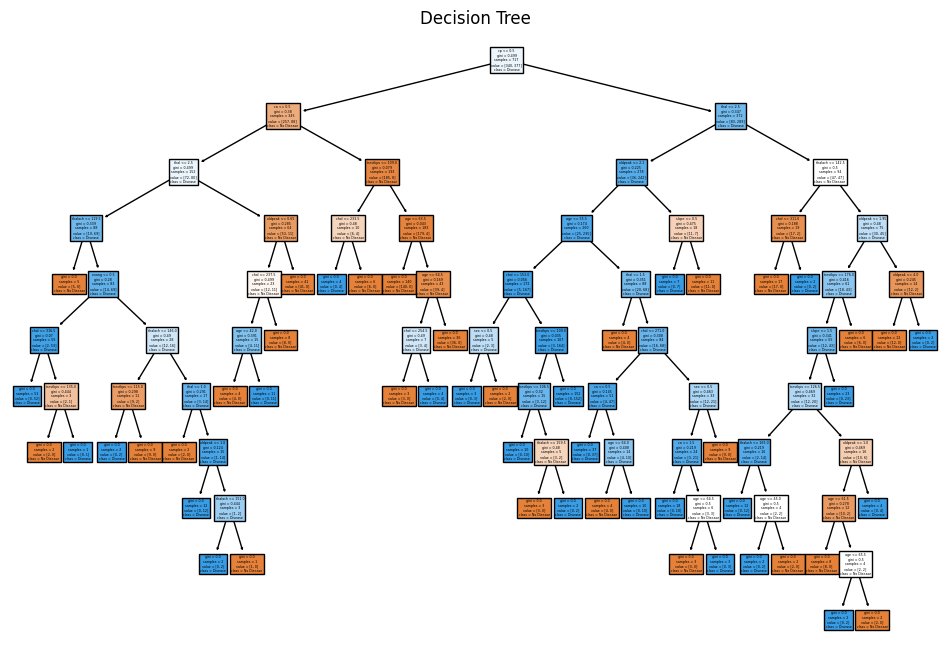

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

# Plot the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree")
plt.show()

Mean Squared Error: 49003243.60682007
R-squared: 0.6843565603663775


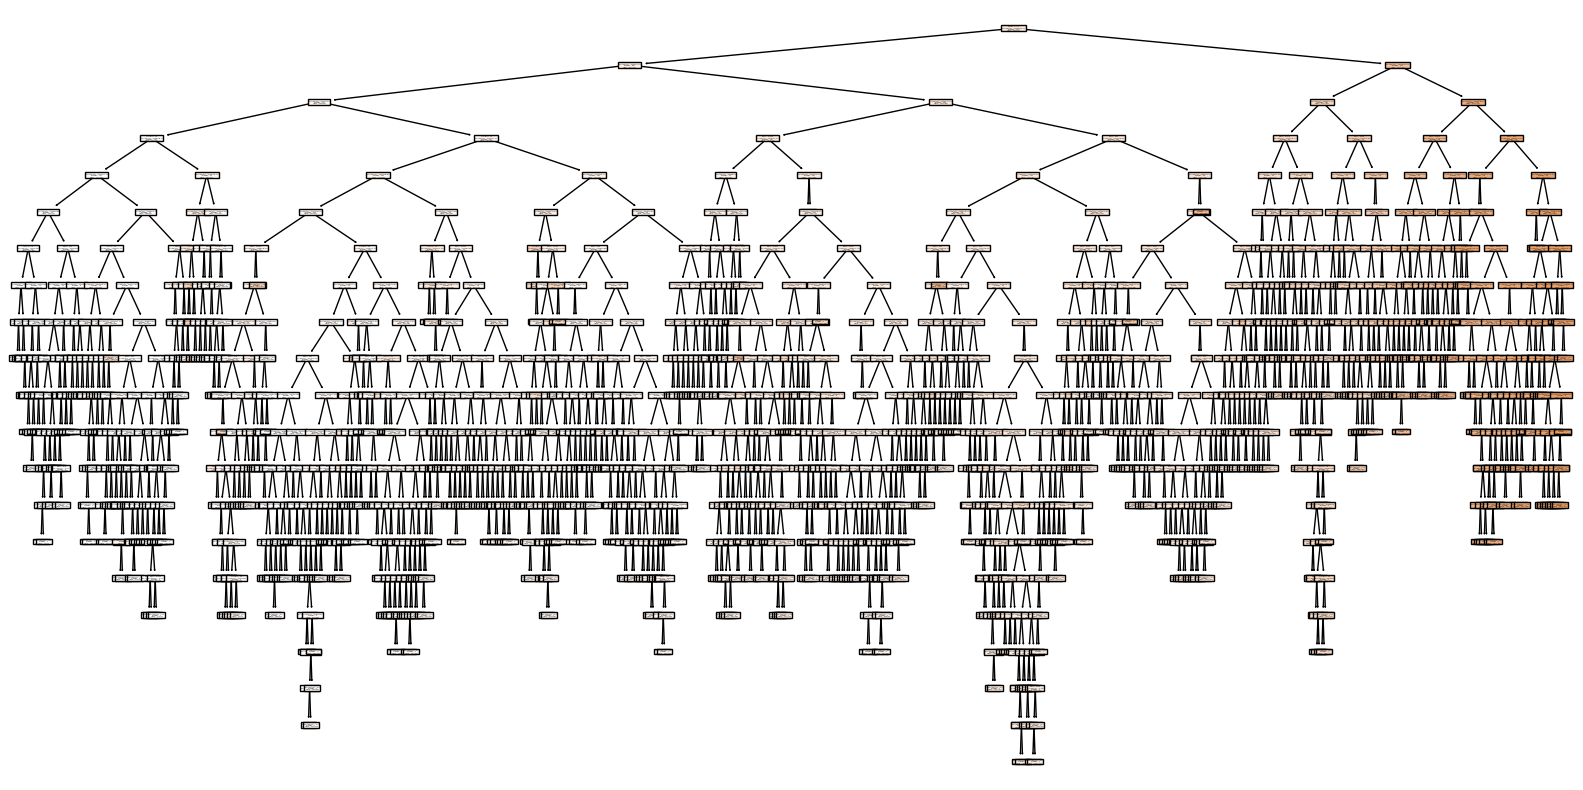

Best Model Mean Squared Error: 22812669.85234084
Best Model R-squared: 0.8530572866320028


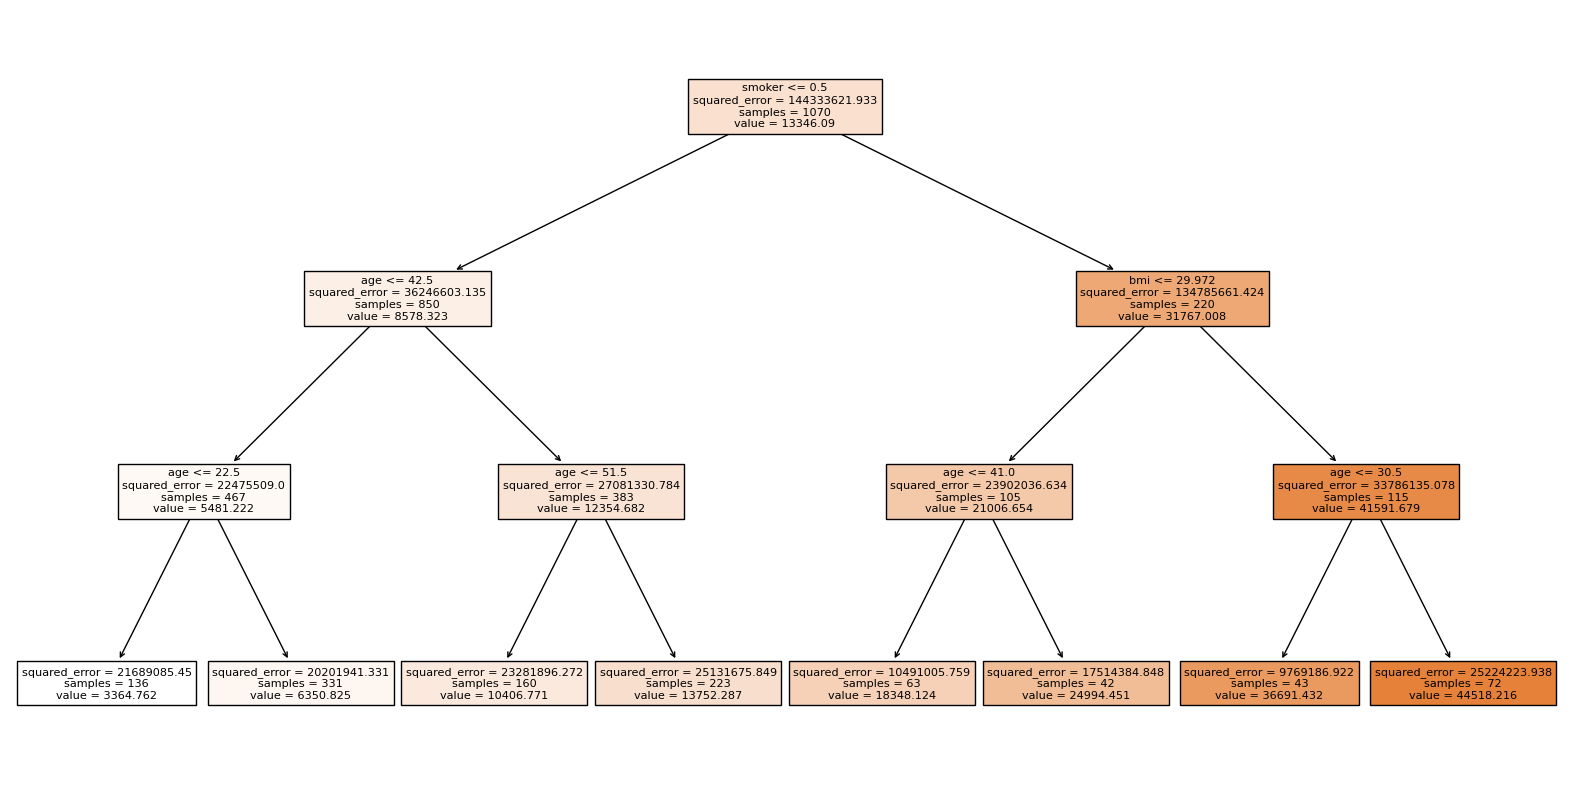

age: 0.11078694007125826
sex: 0.0
bmi: 0.17641114097720365
children: 0.0
smoker: 0.7128019189515381
region: 0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('insurance.csv')

# Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# Features and target variable
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns)
plt.show()

# Tune the hyperparameters using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Model Mean Squared Error: {mse_best}")
print(f"Best Model R-squared: {r2_best}")

# Visualize the Best Decision Tree
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns)
plt.show()

# Feature importance
feature_importances = best_model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
# Make sure to upload your file in the Colab environment


# Assuming the file is named 'heart.csv'
heart_data = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(heart_data.head())

# Preprocessing: Separate features and target variable
X = heart_data.drop('target', axis=1)  # Replace 'target' with the actual column name for the labels
y = heart_data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the KNN classifier with k=5 (you can change the value of k)
knn = KNeighborsClassifier(n_neighbors=8)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       102
           1       0.81      0.89      0.85       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205


Confusion Matr

In [ ]:
import pandas as pd
import numpy as np
dfa= pd.read_csv('heart.csv')
print(dfa.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
dfa.dropna(inplace=True)


In [ ]:
dfa['HRR'] = 220 - dfa['Age'] - dfa['MaxHR']
print(dfa.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  HRR  
0              N      0.0       Up             0    8  
1              N      1.0     Flat             1   15  
2              N      0.0       Up             0   85  
3              Y      1.5     Flat             1   64  
4              N      0.0       Up             0   44  
